In [165]:
import numpy as np 
import pandas as pd 
from datetime import date, datetime
import matplotlib.pyplot as plt
import seaborn as sns

## Uploading data

In [166]:
df= pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908.csv')
df.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


### Date: 
Date of accident, in the format - January 01, 200

### Time: 
Local time, in 24 hr. format unless otherwise specifie

###Location: 
Location of the acciden

### Operator: 
Airline or operator of the aircraf

### Flight #: 
Flight number assigned by the aircraft operato

### Route: 
Complete or partial route flown prior to the accidence

### Type: 
Aircraft typ

### Registration: 
ICAO registration of the aircraf

### cn/In: 
Construction or serial number / Line or fuselage numbe

### Aboard: 
Total aboard (passengers / crew)d1

# Identifying the probelm:

#### Temporal Trends:

How has the frequency of airplane crashes changed over timcrashes?

#### Geospatial Analysis:
What regions or countries have the highest incidence of airplane crashes?


## Data types and missing values

In [167]:
df.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [168]:
df.shape

(5268, 13)

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5268 non-null   object 
 1   Time          3049 non-null   object 
 2   Location      5248 non-null   object 
 3   Operator      5250 non-null   object 
 4   Flight #      1069 non-null   object 
 5   Route         3561 non-null   object 
 6   Type          5241 non-null   object 
 7   Registration  4933 non-null   object 
 8   cn/In         4040 non-null   object 
 9   Aboard        5246 non-null   float64
 10  Fatalities    5256 non-null   float64
 11  Ground        5246 non-null   float64
 12  Summary       4878 non-null   object 
dtypes: float64(3), object(10)
memory usage: 535.2+ KB


In [170]:
df.describe()

,Aboard,Fatalities,Ground
count,5246.000000,5256.000000,5246.000000
mean,27.554518,20.068303,1.608845
std,43.076711,33.199952,53.987827
min,0.000000,0.000000,0.000000
25%,5.000000,3.000000,0.000000
50%,13.000000,9.000000,0.000000
75%,30.000000,23.000000,0.000000
max,644.000000,583.000000,2750.000000


### Missing values & duplicated rows

In [171]:
df.isnull().sum()

Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1707
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64

In [172]:
#missing value percentage of each column
df.isnull().mean() * 100

Date             0.000000
Time            42.122248
Location         0.379651
Operator         0.341686
Flight #        79.707669
Route           32.403189
Type             0.512528
Registration     6.359150
cn/In           23.310554
Aboard           0.417616
Fatalities       0.227790
Ground           0.417616
Summary          7.403189
dtype: float64

In [173]:
unique_rows_df = df.drop_duplicates()
d=len(unique_rows_df)-len(df)
print('number of duplicated rows is: '+ str(d))

number of duplicated rows is: 0


## Cleaning

In [174]:
df.drop(['Flight #', 'Registration', 'cn/In'], inplace=True, axis=1)

In [175]:
df['Route'] = df['Route'].fillna('Not defined')
df['Summary'] = df['Summary'].fillna('No comments')
df['Operator'] = df['Operator'].fillna('Unknown')
df['Type'] = df['Type'].fillna('No Type')
df['Location'] = df['Location'].fillna('unknown')

## Feature engineering

In [176]:
df["Date"]=pd.to_datetime(df['Date'])
df["Year"]=pd.DatetimeIndex(df["Date"]).year
df["Month"]=pd.DatetimeIndex(df["Date"]).month
df["Day"]=pd.DatetimeIndex(df["Date"]).day
df['DayOfWeek'] = pd.DatetimeIndex(df['Date']).day_name()
df['DateOfYear'] = df['Month'].astype(str) +'/'+ df['Day'].astype(str)

In [177]:
#df['Fatalities'] = df['Fatalities'].fillna(0)

df['survived'] =  df['Aboard']-df["Fatalities"]
df['surviving_ratio']= df["Fatalities"]/df['Aboard']
df['Decade'] = (df['Year']) // 10 * 10

df["Military"] = (df['Operator'].str.contains("Military",regex=False)).astype(int)

df["hijacked"] = (df['Summary'].str.contains("hijack",regex=False)).astype(int)
df['Country']  = df['Location'].str.split(',').str[-1].str.strip().str.upper()

In [178]:
def military(x):
    if x: return 'Military'
    return ' Non-Military'

df["Military"]=df["Military"].apply(military)

In [179]:
#determiner les seasons
def get_season(month):
    if month >= 3 and month <= 5:
        return 'Spring'
    elif month >= 6 and month <= 8:
        return 'Summer'
    elif month >= 9 and month <= 11:
        return 'Autumn'
    else:
        return 'Winter'

df['Season'] = df['Month'].apply(get_season)

In [180]:
#managing time
df['Time'] = pd.to_datetime(df['Time'], format="%H:%M", errors='coerce')
df['hour'] = df['Time'].dt.hour
df['Time'] = df['Time'].dt.strftime('%H:%M')

df_date_index=df.set_index('Date')

In [181]:
# Apply the function to create a new 'day_night' column
def categorize_day_night(hour):
    if hour>0:
        if 6 <= hour < 18:
            return 'day'
        else:
            return 'night'
    else:
        return "undetermined"
        

df['day_night'] = df['hour'].apply(categorize_day_night)
df['hour'] = df['hour'].fillna(-1).astype(int)
#we filled missing values with -1 to indecate undetermined hour

In [182]:
df.columns

Index(['Date', 'Time', 'Location', 'Operator', 'Route', 'Type', 'Aboard',
       'Fatalities', 'Ground', 'Summary', 'Year', 'Month', 'Day', 'DayOfWeek',
       'DateOfYear', 'survived', 'surviving_ratio', 'Decade', 'Military',
       'hijacked', 'Country', 'Season', 'hour', 'day_night'],
      dtype='object')

In [183]:
df.isnull().sum()

Date                  0
Time               2232
Location              0
Operator              0
Route                 0
Type                  0
Aboard               22
Fatalities           12
Ground               22
Summary               0
Year                  0
Month                 0
Day                   0
DayOfWeek             0
DateOfYear            0
survived             22
surviving_ratio      24
Decade                0
Military              0
hijacked              0
Country               0
Season                0
hour                  0
day_night             0
dtype: int64

In [184]:
#df.to_csv('final_df.csv', index=False)

## Visualizing by date

### visualizing crashes by date

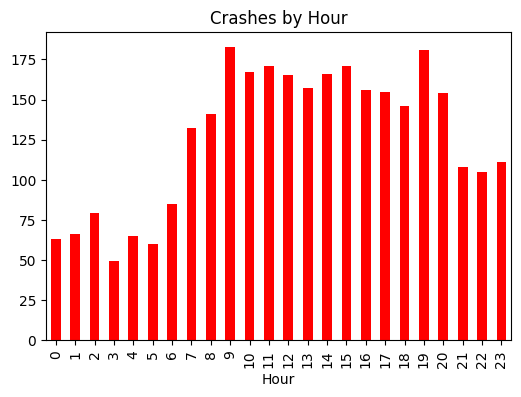

In [185]:
crashed_by_hour = df[df['hour'] != -1]

crashes_by_hour_count = crashed_by_hour['hour'].value_counts()

crashes_by_hour_count.sort_index().plot(kind='bar', figsize=[6, 4], title='Crashes by Hour', color='red')
plt.xlabel('Hour')
plt.show()

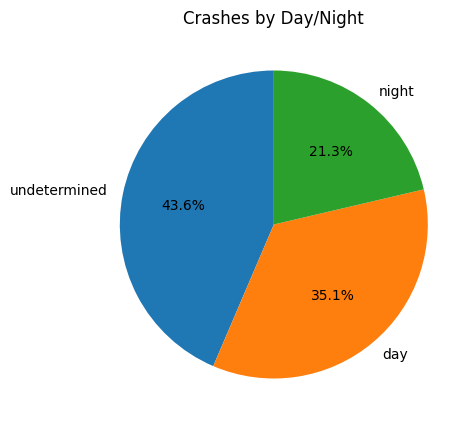

In [186]:
df['day_night'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(5, 5))
plt.title('Crashes by Day/Night')
plt.ylabel('')  # Remove the default ylabel which is the column name ('day_night')
plt.show()

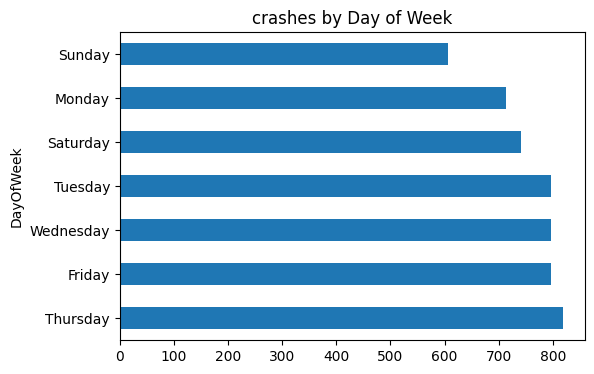

In [187]:
df['DayOfWeek'].value_counts().plot(kind='barh', figsize=[6, 4], title='crashes by Day of Week')
plt.show()

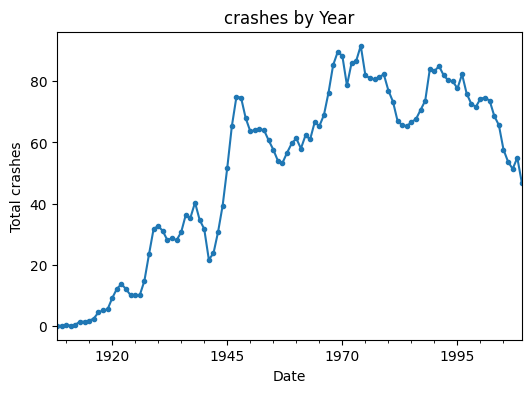

In [188]:
crashed_by_year=df_date_index.resample('1y').size().rolling(3).mean().fillna(0)
crashed_by_year.plot(figsize=[6, 4], title='crashes by Year', ylabel='Total crashes', marker=".")
plt.show()
#measures for safety

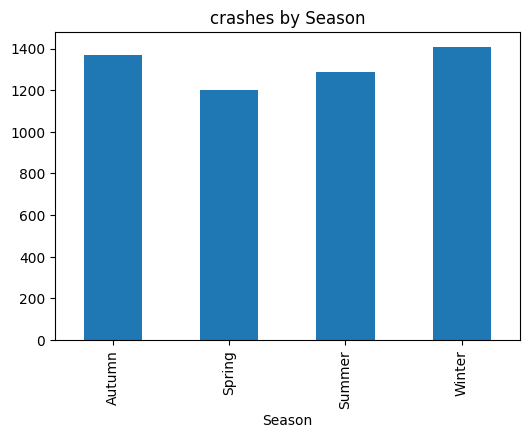

In [189]:
crashed_by_season = df['Season'].groupby(df['Season']).count()

crashed_by_season.plot(kind='bar', figsize=[6, 4], title='crashes by Season')
plt.show()

### Visualizing fatilities

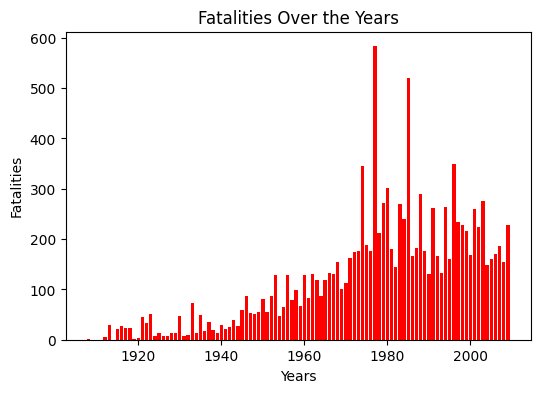

In [190]:
plt.figure(figsize=(6,4))
plt.bar(df['Year'], df['Fatalities'],color='red')
plt.xlabel('Years')
plt.ylabel('Fatalities')
plt.title('Fatalities Over the Years')
plt.show()

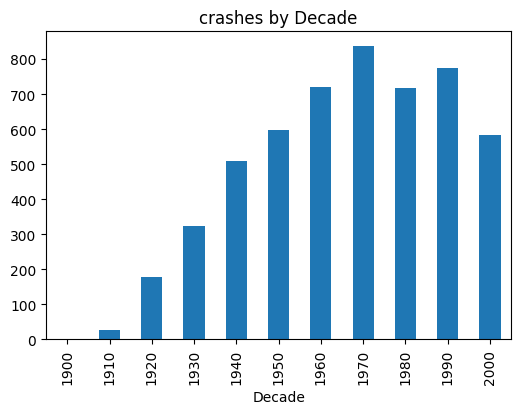

In [191]:
crashed_by_Decade = df['Decade'].groupby(df['Decade']).count()

crashed_by_Decade.plot(kind='bar', figsize=[6, 4], title='crashes by Decade')
plt.show()

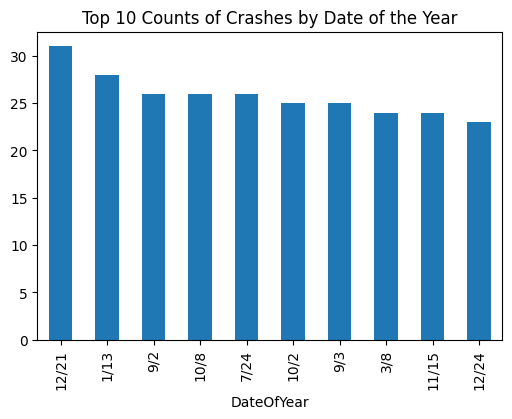

In [192]:
df['DateOfYear'].value_counts().head(10).plot(
    kind='bar', figsize=[6, 4], title='Top 10 Counts of Crashes by Date of the Year')
plt.show()
#new year

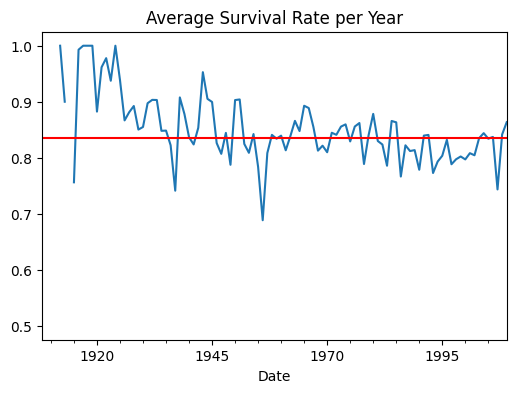

In [193]:
df_date_index["surviving_ratio"].resample('1y').mean().plot(title="Average Survival Rate per Year", figsize=[6, 4])

# Add a horizontal line for the overall mean surviving ratio
plt.axhline(y=df_date_index["surviving_ratio"].mean(), color='r', linestyle='-')

# Display the plot
plt.show()


#### some info about Ground

In [194]:
df1=df[df['Ground']>0]
print(df1.shape)

(219, 24)


In [195]:
top_two_indices = df1['Ground'].nlargest(2).index
top_two_rows = df1.loc[top_two_indices, 'Summary']

print("Second Max Row:")
print(top_two_rows.iloc[1])

print("\nMax Ground Row:")
print(df1.loc[df1['Ground'].idxmax(), 'Summary'])

Second Max Row:
The aircraft was hijacked shortly after it left Logan International Airport in Boston. The hijackers took control of the aircraft and deliberately crashed it into the south tower of the World Trade Center between the 78th and 84th floors at approximately 550 mph. After 56 minutes, the building collapsed. It was one of four planes that were hijacked the same day.

Max Ground Row:
The aircraft was hijacked shortly after it left Logan International Airport in Boston. The hijackers took control of the aircraft and deliberately crashed it into the north tower of the World Trade Center between the 94th and 99th floors at approximately 450 mph.  After 102 minutes, the building collapsed. It was one of four planes that were hijacked the same day.


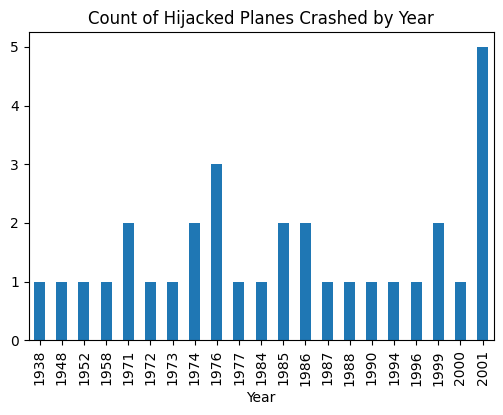

In [196]:
import matplotlib.pyplot as plt

df[df['Summary'].str.contains('hijack', case=False)]['Year'].value_counts().sort_index().plot(
    kind='bar', figsize=[6, 4], title='Count of Hijacked Planes Crashed by Year')
plt.show()


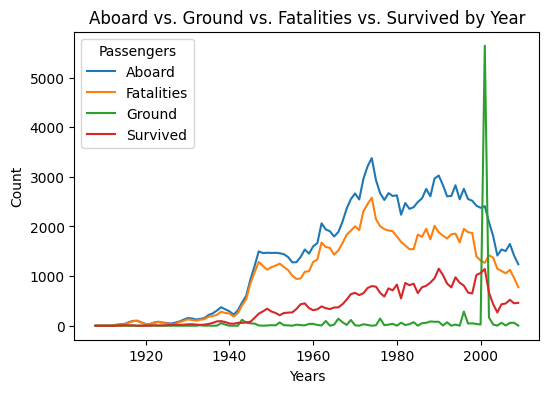

In [197]:
# Applying a 3-year rolling average to smoothen the 'Aboard,' 'Fatalities,' and 'Survived' series
aboard_year = df[['Aboard', 'Year']].groupby(['Year']).sum()
aboard_year = aboard_year.rolling(3).mean().fillna(0)

fatalities_year = df[['Fatalities', 'Year']].groupby(['Year']).sum()
fatalities_year = fatalities_year.rolling(3).mean().fillna(0)

survived_year = df[['survived', 'Year']].groupby(['Year']).sum()
survived_year = survived_year.rolling(3).mean().fillna(0)

# Extracting the 'Ground' series without applying the moving average
ground_year = df[['Ground', 'Year']].groupby(['Year']).sum()

# Plotting the data with the respective series
plt.figure(figsize=(6, 4))

plt.plot(aboard_year, label='Aboard')
plt.plot(fatalities_year, label='Fatalities')
plt.plot(ground_year, label='Ground')
plt.plot(survived_year, label='Survived')

# Adding legend and labels
plt.legend(title='Passengers')
plt.ylabel('Count')
plt.xlabel('Years')
plt.title('Aboard vs. Ground vs. Fatalities vs. Survived by Year')

# Displaying the plot
plt.show()


## Visualing by Location

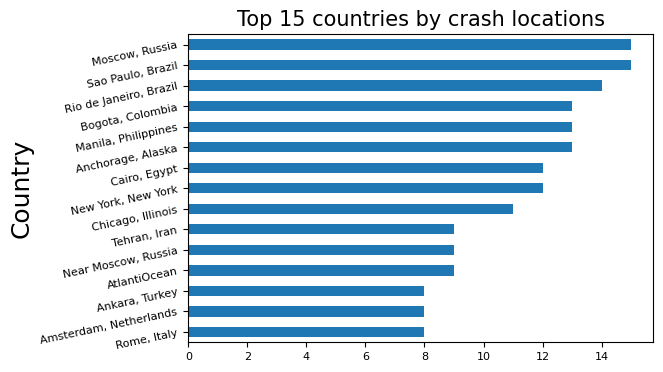

In [198]:
df['Location'][df['Location']!='unknown'].value_counts()[:15].sort_values(ascending=True).plot(kind='barh',  figsize=[6, 4], rot=12, fontsize=8)
plt.title("Top 15 countries by crash locations",fontsize=15)
plt.ylabel('Country',fontsize=18)
plt.show()

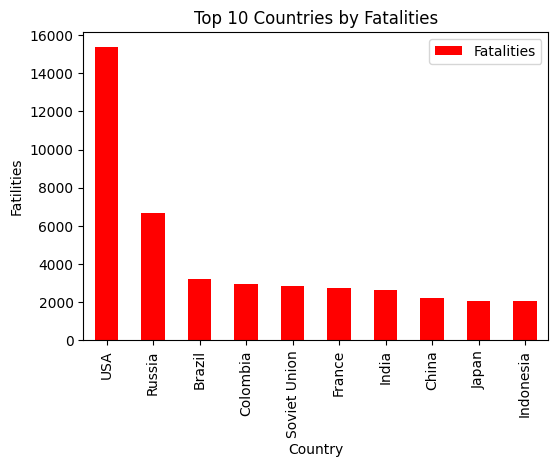

In [199]:
# Extracting country information from the 'Location' column in the DataFrame
location_split = df['Location'].str[0:].str.split(',', expand=True)
df['Country'] = location_split[3].fillna(location_split[2]).fillna(location_split[1]).str.strip()

# Creating a list of U.S. states for country assignment
us_states = ['Alabama', 'Alakska', 'Alaska', 'Arizona', 'Arizona', 'Arkansas', 'California', 'California', 
             'California', 'Colorado', 'Colorado', 'Connecticut', 'D.C.', 'Delaware', 'Delaware', 'Florida',
             'Georgia', 'Georgia', 'Hawaii', 'HI', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
             'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 
             'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 
             'New York', 'New York (Idlewild)', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oklahoma',
             'Oregon', 'Pennsylvania', 'Rhode Island', 'South Dakota', 'Tennessee', 'Tennessee', 'Texas', 'United States',
             'Utah', 'Vermont', 'Virginia', 'Virginia', 'Virginia.', 'Washington', 'Washington', 'Washington DC', 'West Virginia',
             'Wisconsin', 'Wisconsin', 'WY']

russian_countries = ['Russian']  # Russia
soviet_countries = ['USSR']  # Soviet Union

# Cleaning and categorizing countries
cleaned_countries = []
for country in df['Country'].values:
    if country in russian_countries:
         cleaned_countries.append('Russia')
    elif country in us_states:
        cleaned_countries.append('USA')
    elif country in soviet_countries:
        cleaned_countries.append('Soviet Union')
    else:
        cleaned_countries.append(country)

df['Cleaned Country'] = cleaned_countries

# Grouping and analyzing total fatalities by cleaned country
fatal_countries = df[['Fatalities', 'Cleaned Country']].groupby(
    ['Cleaned Country']).sum().sort_values('Fatalities', ascending=False)
fatal_countries.reset_index(inplace=True)
fatal_countries.head(10).plot(
    x='Cleaned Country', y='Fatalities', kind='bar', figsize=[6, 4], title='Top 10 Countries by Fatalities',color="red")
plt.xlabel('Country')
plt.ylabel('Fatilities')
plt.show()

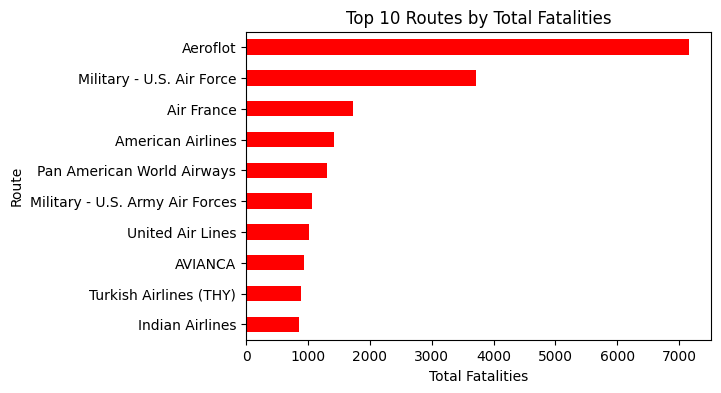

In [200]:
df.groupby(['Operator'])['Fatalities'].sum().sort_values( ascending=False).head(10).sort_values().plot.barh(color='red', figsize=(6,4))

plt.xlabel('Total Fatalities')
plt.ylabel('Route')
plt.title('Top 10 Routes by Total Fatalities')
plt.show()

## Visualising by airplane Type/Operator

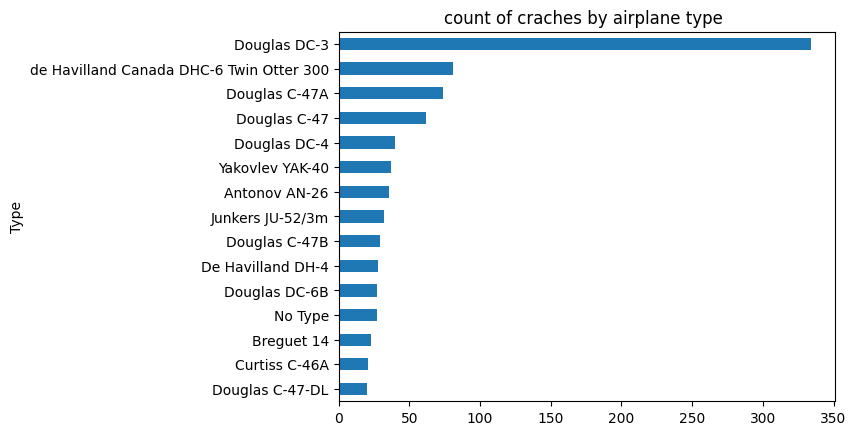

In [201]:
df['Type'].value_counts().head(15).sort_values().plot.barh(title='count of craches by airplane type ')
plt.show()

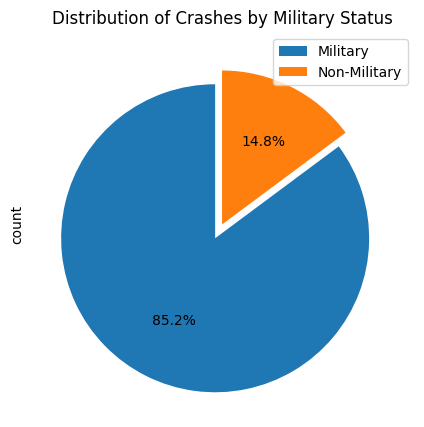

In [202]:
import matplotlib.pyplot as plt

# Assuming df['Military'] contains boolean values
labels = ['Military', 'Non-Military']
explode = (0.1, 0)  # explode the first slice (Military)

df['Military'].value_counts().plot(
    kind='pie', autopct='%1.1f%%', labels=None, explode=explode, startangle=90, figsize=(5, 5),
    title='Distribution of Crashes by Military Status')

# Adding legend
plt.legend(labels=labels, loc='upper right')

plt.show()


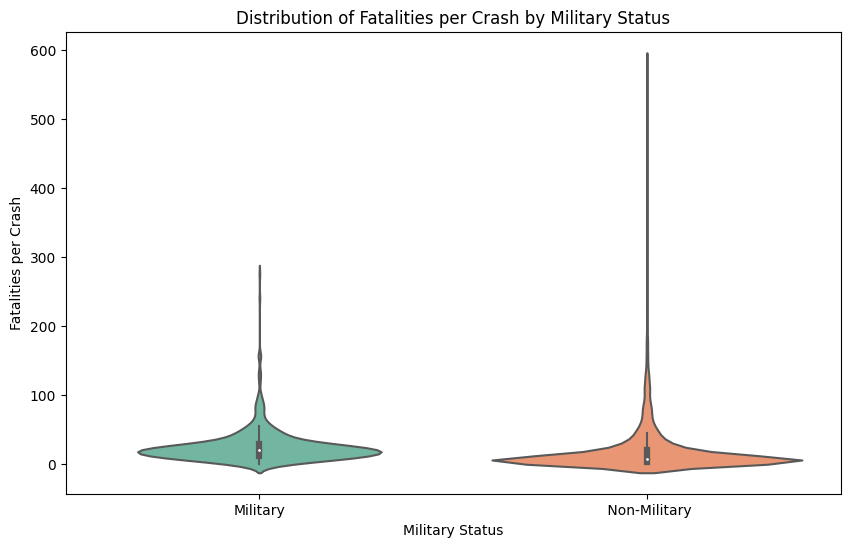

In [203]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

sns.violinplot(x='Military', y='Fatalities', data=df, palette='Set2',figsize=[6,4])

plt.title('Distribution of Fatalities per Crash by Military Status')
plt.xlabel('Military Status')
plt.ylabel('Fatalities per Crash')

plt.show()
